In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from biaxread import *
from scipy.signal import medfilt

%matplotlib inline

In [2]:
def dc_disp(disp):
    return np.exp(-0.33*disp)*70 + 5

def amb_disp(disp):
    return np.exp(disp*-0.23)*0.5 -0.003

In [3]:
p4309_a,p4309_b,p4309_Dc,p4309_amb,step_row = np.loadtxt('p4309_ruina_fits.csv',usecols=[0,2,4,6,9],delimiter=',',skiprows=1,unpack=True)
p4309_data = ReadAscii('/Users/jleeman/Dropbox/PennState/BiaxExperiments/p4309/p4309_data.txt')
step_row = step_row.astype(int)
step_disp = p4309_data['LP_Disp'][step_row]
p4309_step_disp = step_disp/1000.
p4309_kc = (p4309_b - p4309_a)/p4309_Dc
p4309_kc = p4309_kc * 10000


Number of records: 434907
Number of columns: 10


-------------------------------------------------
|           Name|           Unit|        Records|
-------------------------------------------------
|        row_num|            mic|         434907|
|        LP_Disp|            MPa|         434907|
|     Shr_stress|         micron|         434907|
|       nor_disp|            MPa|         434907|
|     Nor_stress|            sec|         434907|
|           Time|         micron|         434907|
|       On_Board|             Hz|         434907|
|      Samp_Freq|              .|         434907|
|             mu|         micron|         434907|
-------------------------------------------------


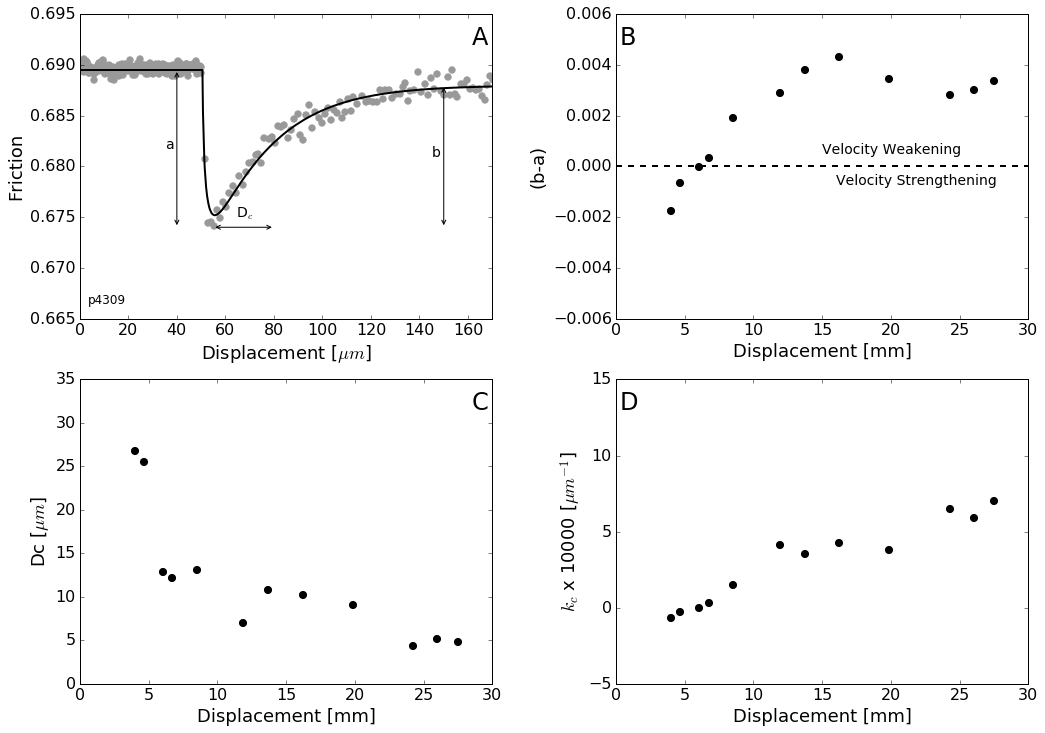

In [4]:
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.subplots_adjust(wspace=0.3)

#
# Velocity Step Plot
#

# Label Plot
ax1.text(0.95,0.9,'A',transform = ax1.transAxes,fontsize=24)
ax1.text(0.02,0.05,'p4309',transform = ax1.transAxes,fontsize=12)

# Set labels and tick sizes
ax1.set_xlabel(r'Displacement [$\mu m$]',fontsize=18)
ax1.set_ylabel(r'Friction',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=16)

p4309 = np.loadtxt('step_2_model.txt',skiprows=5,usecols=[1,7,9])

p4309_mu_downsampled = p4309[184:,2]
p4309_mu_downsampled = p4309_mu_downsampled.reshape((98,10))
p4309_mu_downsampled = np.mean(p4309_mu_downsampled,axis=1)

p4309_disp_downsampled = p4309[184:,0]-p4309[0,0]
p4309_disp_downsampled = p4309_disp_downsampled.reshape((98,10))
p4309_disp_downsampled = np.mean(p4309_disp_downsampled,axis=1)

# row 215 to end for high velocity, 0-19 for red
ax1.scatter(p4309[:183,0]-p4309[0,0],p4309[:183,2],color='0.6',s=40, label='p4309 Data')
ax1.scatter(p4309_disp_downsampled, p4309_mu_downsampled, color='0.6',s=40, label='p4309 Data')
ax1.plot(p4309[:,0]-p4309[0,0],p4309[:,1],color='k',linewidth=2, label='p4309 Model')

# Add "a" arrow
arrow_x = [40,40]
arrow_y = [0.674,0.6895]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(arrow_x[0]-5,np.mean(arrow_y),'a',fontsize=14)

# Add "b" arrow
arrow_x = [150,150]
arrow_y = [0.674,0.688]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(arrow_x[0]-5,np.mean(arrow_y),'b',fontsize=14)

# Add "Dc" arrow
arrow_x = [55,55+25]
arrow_y = [0.674,0.674]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(np.mean(arrow_x)-3,arrow_y[0]+0.001,r'D$_c$',fontsize=14)

ax1.set_ylim(0.665,0.695)
ax1.set_xlim(0,170)

#
# Left Plot of a-b
#

# Label Plot
ax2.text(0.01,0.9,'B',transform = ax2.transAxes,fontsize=24)

# Set labels and tick sizes
ax2.set_xlabel(r'Displacement [mm]',fontsize=18)
ax2.set_ylabel(r'(b-a)',fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Plotting
ax2.scatter(p4309_step_disp,-1*p4309_amb,color='k',s=50)

ax2.axhline(y=0,color='k',linewidth='2',linestyle='--')

# Label velocity regions
ax2.text(15,0.0005,'Velocity Weakening',fontsize=14)
ax2.text(16,-0.0007,'Velocity Strengthening',fontsize=14)

ax2.set_ylim(-0.006 ,0.006)

#
# Right Plot of Dc
#

# Label Plot
ax3.text(0.95,0.9,'C',transform = ax3.transAxes,fontsize=24)

# Set labels and tick sizes
ax3.set_xlabel(r'Displacement [mm]',fontsize=18)
ax3.set_ylabel(r'Dc [$\mu m$]',fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=16)

# Plotting
ax3.scatter(p4309_step_disp,p4309_Dc,color='k',s=50)

ax3.set_ylim(0.0,35)

#
# Kc
#

# Label Plot
ax4.text(0.01,0.9,'D',transform = ax4.transAxes,fontsize=24)

# Set labels and tick sizes
ax4.set_xlabel(r'Displacement [mm]',fontsize=18)
ax4.set_ylabel(r'$k_c$ x 10000 [$\mu m^{-1}$]',fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=16)

# Plotting
ax4.scatter(p4309_step_disp,p4309_kc,color='k',s=50)

ax4.set_ylim(-5,15)
ax4.set_xlim(0,30)

### TRY FUN WITH DC FITTING
# x = np.arange(1,30)
# y = np.exp(-0.33*x)*70 + 5
# ax3.plot(x,y,color='k',linewidth=2)
# ax3.set_xlim(0,30)

# x2 = np.arange(1,50)
# y2 = np.exp(-x2*0.23)*0.5 -0.003
# x2 = x2 - 15.5
# ax2.plot(x2,y2,color='k',linewidth=2)
# ax2.set_xlim(0,30)

# x3 = np.arange(1,30)
# amb = amb_disp(x3+15.5)
# dcs = dc_disp(x3)
# y3 = -1.*amb/dcs
# ax4.plot(x3,y3*10000,color='k',linewidth=2)

plt.savefig('RSF_Parameters.png', bbox_inches="tight")